# Text Mining_Q1_Elon Musk

1) Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)

# 1. Import Libs

In [14]:
pip install -U spacy

  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.1.0
    Uninstalling smart-open-5.1.0:
      Successfully uninstalled smart-open-5.1.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
from wordcloud import WordCloud
import re 
import warnings
warnings.filterwarnings('ignore')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer


# 2. Import Data

In [3]:
tweets=pd.read_csv('Elon_musk.csv',encoding='Latin-1')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# 3. Data Preprocessing

####  remove both the leading and the trailing characters

In [5]:
tweets=[Text.strip() for Text in tweets.Text] 
tweets=[Text for Text in tweets if Text] # removes empty strings.
tweets[0:10]


['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

#### Joining the list into one string/text

In [6]:
tweets_text=' '.join(tweets)
tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [7]:
tweets_text = re.sub("[^A-Za-z" "]+"," ",tweets_text).lower() #remove special character
tweets_text = re.sub("[0-9" "]+"," ",tweets_text).lower() #remove numbers
tweets_text = re.sub(r'^https?:\/\/.*[\r\n]*', '', tweets_text).lower() #remove hyperlink
tweets_text

' kunalb i m an alien id aa carmack ray tracing on cyberpunk with hdr is next level have you tried it joerogan spotify great interview gtera doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox https t co wfkmyu oj frodo was the underdoge all thought he would fail himself most of all https t co zgxjfdzzrm owensparks flcnhvy anonyx haha thanks flcnhvy anonyx indeed tweets definitely do not represent real world time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest https t co rwe uhsts geoffkeighley unrealengine it s getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy u f u f this is true power haha https t co fc uhqsd o freewalletorg any cr

In [8]:
wordnet = WordNetLemmatizer()

In [9]:
text_tokens = word_tokenize(tweets_text)

In [10]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [11]:
tf = TfidfVectorizer()

In [12]:
text_tf = tf.fit_transform(tokens_without_sw)

####  Create the DataFrame

In [13]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [14]:
df

,aa,aayypcpp,abo,aboard,abort,absence,absolute,absolutely,absorb,absorption,...,zubinanary,zugaquvpy,zvm,zwiebelbach,zxd,zyf,zyj,zynsxisp,zz,zzcool
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
word_list = ' '.join(df)

In [47]:
wordcloud = WordCloud(background_color='black',width=1800,height=1400).generate(word_list)

(-0.5, 1799.5, 1399.5, -0.5)

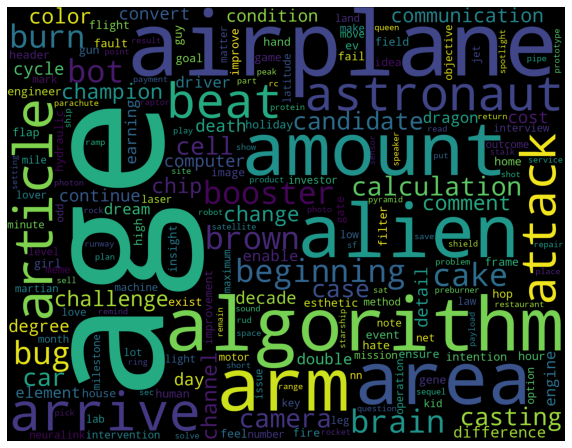

In [49]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')

# 4. Sentimental Analysis

In [43]:
with open('positive-words.txt') as pw:
    positive_words = pw.read().split("\n")

In [44]:
positive_words = positive_words[35:]
positive_words

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [45]:
with open('negative-words.txt') as nw:
    negative_words = nw.read().split("\n")

In [46]:
negative_words = negative_words[35:]
negative_words

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


In [22]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])


In [23]:
wordcloud_pos = WordCloud(background_color='black',width=1800,height=1400).generate(txt_pos_in_pw)

(-0.5, 1799.5, 1399.5, -0.5)

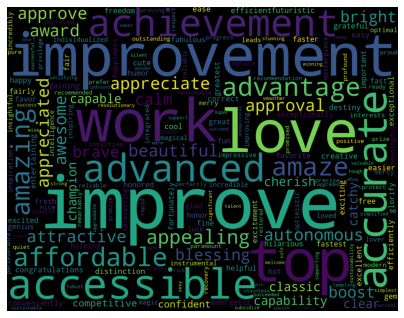

In [57]:
plt.figure(figsize=(7,15))
plt.imshow(wordcloud_pos)
plt.axis('off')

In [25]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [26]:
wordcloud_neg = WordCloud(background_color='black',width=1800,height=1400).generate(txt_neg_in_nw)

(-0.5, 1799.5, 1399.5, -0.5)

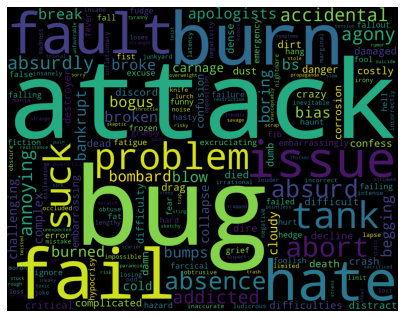

In [58]:
plt.figure(figsize=(7,15))
plt.imshow(wordcloud_neg)
plt.axis('off')

# END